In [1]:
using Dates; now()

2019-03-21T09:27:02.923

In [2]:
# load packages
using Revise, MathematicalSystems, LazySets, Reachability, TaylorIntegration

using Plots

┌ Info: Recompiling stale cache file /Users/forets/.julia/compiled/v1.1/Reachability/CHV4V.ji for Reachability [774a0091-654f-5c65-bbdc-ad5b67b45832]
└ @ Base loading.jl:1184


## 2D circle model

Defining the model:

$$
x' = y\\~~y' = -x
$$

In [72]:
A = [0 1.; -1 0]
X0 = BallInf(ones(2), 0.1)
problem = InitialValueProblem(LinearContinuousSystem(A), X0)

dump(problem)

InitialValueProblem{LinearContinuousSystem{Float64,Array{Float64,2}},BallInf{Float64}}
  s: LinearContinuousSystem{Float64,Array{Float64,2}}
    A: Array{Float64}((2, 2)) [0.0 1.0; -1.0 0.0]
  x0: BallInf{Float64}
    center: Array{Float64}((2,)) [1.0, 1.0]
    radius: Float64 0.1


**Solution using `BFFPSV18` algorithm.**

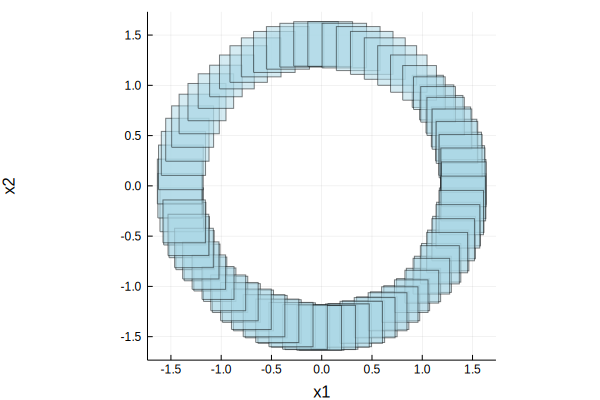

In [68]:
sol_BFFPSV18 = solve(problem, Options(:T=>10.0, :plot_vars=>[1, 2]), op=BFFPSV18(:δ=>0.1));

plot(sol_BFFPSV18, use_subindices=false, aspectratio=1, alpha=.5, color=:lightblue)

In [69]:
@btime solve($problem, Options(:T=>10.0, :plot_vars=>[1, 2]), op=BFFPSV18(:δ=>0.1));

  13.447 ms (9604 allocations: 718.38 KiB)


**Solution using `TMJets` algorithm.**

First we need to write the system in the form `x'(t) = f(x(t), u(t))`.

In [55]:
@taylorize function circle!(t, x, dx)
    dx[1] = x[2]
    dx[2] = -x[1]
end
f = BlackBoxContinuousSystem(circle!, 2)
problem = InitialValueProblem(f, X0)

InitialValueProblem{BlackBoxContinuousSystem{typeof(circle!)},BallInf{Float64}}(BlackBoxContinuousSystem{typeof(circle!)}(circle!, 2), BallInf{Float64}([1.0, 1.0], 0.1))

In [63]:
sol_TMJets = solve(problem, Options(:T=>10.0, :plot_vars=>[1, 2]),
                   op=TMJets(:orderT=>7, :orderQ=>2, :abs_tol=>1e-12, :max_steps=>1000));

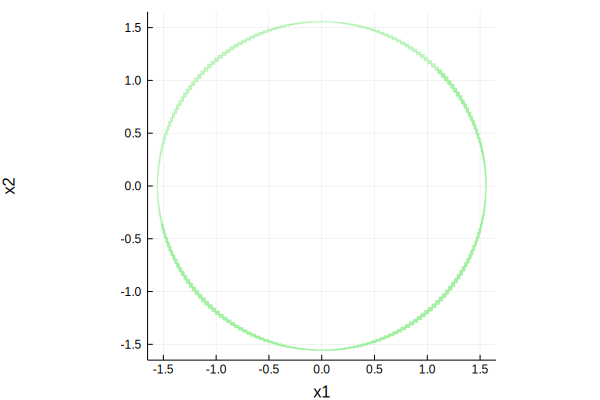

In [61]:
plot(sol_TMJets, use_subindices=false, aspectratio=1, alpha=.5, color=:lightgreen)

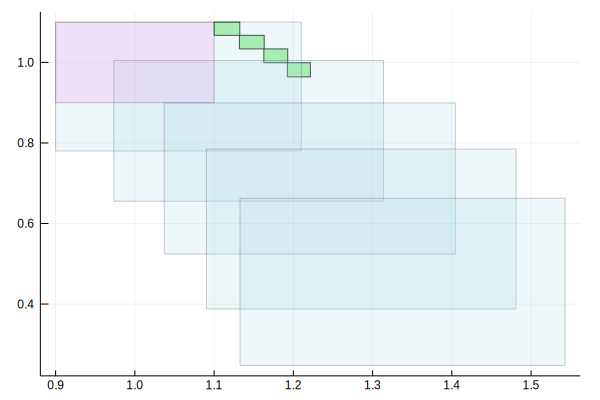

In [85]:
plot([sol_TMJets.Xk[i].X for i in 1:5], color=:lightgreen, alpha=.8)
plot!([sol_BFFPSV18.Xk[i].X for i in 1:5], color=:lightblue, alpha=.2)
plot!(X0, color=:violet, alpha=0.2)